# Task 1- Data Science & Business Analytics¶
By SHUBHAM Intern at Sparks Foundation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('http://bit.ly/w-data')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratry Data Analysis

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Outlier Removal

In [10]:
def null_detection(df):
    num_cols = []
    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<=3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index',axis=1)
    print(count)
    return df

In [11]:

df = null_detection(df)

0


# Distribution¶

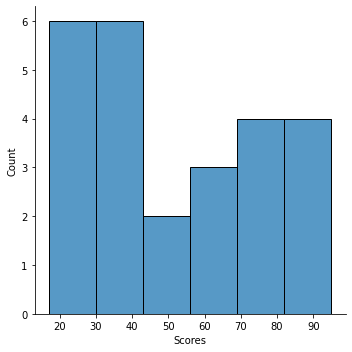

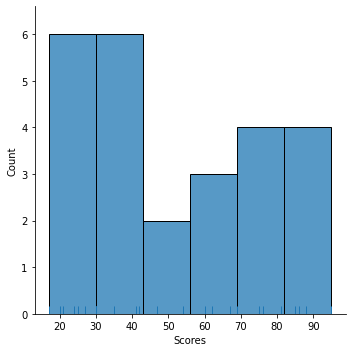

In [12]:

sns.displot(df["Scores"])
plt.show()

sns.displot(df["Scores"], kde=False, rug=True)
plt.show()

sns.jointplot(df["Hours"], df["Scores"], kind = "reg")
plt.show()

# Performing Simple Linear Regression¶
Calculating the coefficients of the simple regression equation: y = Bo+B1.x (B1:Slope, Bo:Intercept)

In [16]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x) * (y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den
Bo = mean_y - B1*mean_x

In [17]:
B1

9.775803390787475

In [18]:
Bo

2.4836734053731746

In [19]:
df['predicted_Scores'] = Bo + B1*df['Hours']
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


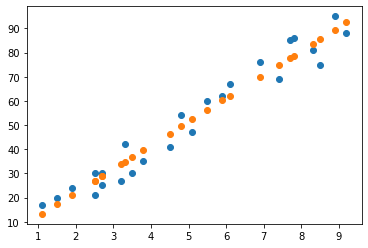

In [20]:
plt.scatter(df['Hours'],df['Scores'])
plt.scatter(df['Hours'],df['predicted_Scores'])
plt.show()